In [ ]:
from tqdm import tqdm
import network
import utils
import os
import random
import argparse
import numpy as np
from datetime import datetime
import json
import pandas as pd
import wandb

from torch.utils import data
from datasets import VOCSegmentation, Cityscapes, NightLab
from utils import ext_transforms as et
from metrics import StreamSegMetrics

import torch
import torch.nn as nn
from utils.visualizer import Visualizer

from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

In [15]:
from tqdm.notebook import tqdm_notebook as tqdm

dir = "/home/chenht/datasets/Carla2Cityscapes/val/semantic"
names = os.listdir(dir)

for name in tqdm(names):
    im = np.array(Image.open(os.path.join(dir, name)))[:, :, 0]
    Image.fromarray(im).save(os.path.join(dir, name))

  0%|          | 0/540 [00:00<?, ?it/s]

In [23]:
import imageio

result_path = "/home/chenht/DeepLabv3plus/DeepLabV3Plus-Pytorch/results/Carla_test_2022-08-31_164919/"

filenames = [os.path.join(result_path, "val_samples", filename) for filename in os.listdir(result_path + "val_samples") if "0_pred" in filename]

picked_frame= [filename for i, filename in enumerate(filenames) if i % 5 == 0]
with imageio.get_writer('/home/chenht/DeepLabv3plus/DeepLabV3Plus-Pytorch/results/Carla_test_2022-08-31_164919/0.gif', mode='I') as writer:
    for frame_num, filename in enumerate(picked_frame):
        progress_bar_len = round(frame_num * 320 / len(picked_frame))
        image = np.array(Image.open(filename).resize((320, 240), resample=Image.BILINEAR))
        image[-8:, :progress_bar_len, 0].fill(220)
        image[-8:, :progress_bar_len, 1].fill(20)
        image[-8:, :progress_bar_len, 2].fill(60)
        # image = np.resize(imageio.imread(filename), (180, 320, 3))
        writer.append_data(image)


In [15]:
11 // 5

2

In [3]:
class a:
    def test(self, input):
        print(input)

def test2(input):
    print("haha")
    
a = a()
a.test = test2
a.test(1)

haha


(-0.5, 1023.5, 511.5, -0.5)

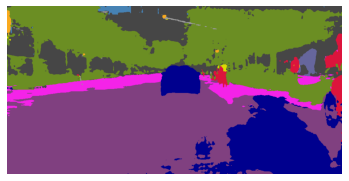

In [2]:
im = np.array(Image.open("/home/chenht/DeepLabv3plus/DeepLabV3Plus-Pytorch/results/test_Carla2CityScapes_on_CityScapes_2022-09-01_160331/val_samples/0_pred_iter_test.png"))
plt.imshow(im)
plt.axis('off')

In [4]:
from datasets.label import get_cs_trainId

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


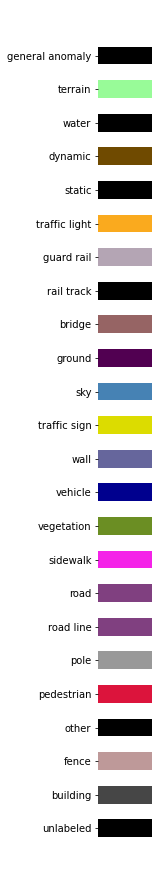

In [54]:
from datasets.label import get_carla_trainId

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1, 16))

classes = get_carla_trainId()

label = [c.carla_name for c in classes]

left = np.array(range(24)) * 1.5
height = np.ones(24) * 2
print(height)

col = [np.array(c.cs_color) / 255 for c in classes]
ax.barh(left, height, tick_label=label,color=col)
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor((1, 1, 1))

fig.patch.set_facecolor('white')

plt.savefig("/home/chenht/DeepLabv3plus/DeepLabV3Plus-Pytorch/results/Carla_color_semantics.png", bbox_inches = 'tight')

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


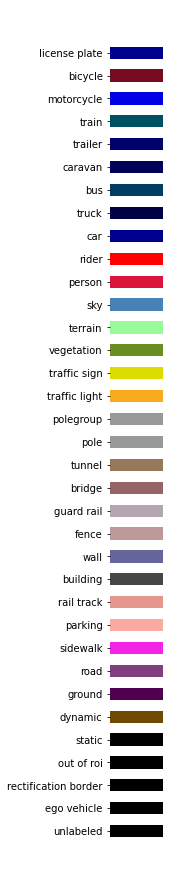

In [53]:
from datasets.label import get_carla_trainId

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1, 16))

classes = get_cs_trainId(None)

label = [c.name for c in classes]

left = np.array(range(35)) * 1.5
height = np.ones(35) * 2
print(height)

col = [np.array(c.color) / 255 for c in classes]
ax.barh(left, height, tick_label=label,color=col)
ax.set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_facecolor((1, 1, 1))

fig.patch.set_facecolor('white')

plt.savefig("/home/chenht/DeepLabv3plus/DeepLabV3Plus-Pytorch/results/CityScpaes_color_semantics.png", bbox_inches = 'tight')

In [3]:
LOADER_WK_ITER = None

def get_next_weak_batch():
    global LOADER_WK
    global LOADER_WK_ITER

    try:
        nxt = LOADER_WK_ITER.__next__()
    except:
        LOADER_WK_ITER = LOADER_WK.__iter__()
        nxt = LOADER_WK_ITER.__next__()
    
    return nxt

TypeError: isinstance() arg 2 must be a type or tuple of types

In [9]:
a = 1
b = 2

def func():
    global a
    global b
    
    a += 1
    b += 1

for i in range(3):
    func()
print(a, b)

4 5
